# Rimon Melamed
## CSCI6364
## HW1

In [7]:
import csv 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Pre-processing: import the data
data_arr = []

with open('data_mnist.csv') as csv_file:
    data_reader = csv.reader(csv_file, delimiter=',')
    for row in data_reader:
        data_arr.append(row)

In [9]:
# Get the labels for the dataset
digits = np.array([e[0] for e in data_arr[1::]])

In [10]:
# Transform the 1D arrays into 28x28 np image arrays
img_list  = [np.array(e[1::], dtype='uint8') for e in data_arr[1::]]
imgs = [np.reshape(e, (28, 28)) for e in img_list]

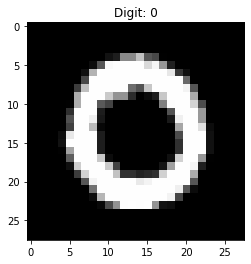

In [11]:
# Show sample image in training data
plt.title('Digit: ' + digits[1])
plt.imshow(imgs[1], cmap='gray')

In [12]:
# Scale the images to be standardized

scaler = StandardScaler()
scaled_imgs = np.array([scaler.fit_transform(e) for e in imgs])

In [13]:
# Split the training data into the training/test data 
(train_imgs, test_imgs, train_digits, test_digits) = train_test_split(scaled_imgs, digits, test_size=.25,\
                                                                      random_state=42, stratify=digits)
train_imgs = train_imgs.reshape((train_imgs.shape[0], train_imgs.shape[1] * train_imgs.shape[2]))
test_imgs = test_imgs.reshape((test_imgs.shape[0], test_imgs.shape[1] * test_imgs.shape[2]))

In [14]:
# We will try different k values and see how they perform empirically based on the mean accuracies..
mean_accuracies = []

for k in range(1, 50):
    model = KNeighborsClassifier(k)
    model.fit(train_imgs, train_digits)
    mean_accuracies.append(model.score(test_imgs, test_digits))

Text(0, 0.5, 'Mean Accuracy')

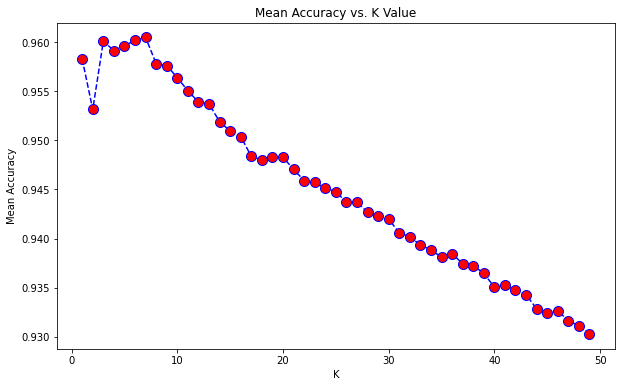

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),mean_accuracies,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean Accuracy')

In [16]:
k = 3
model = KNeighborsClassifier(k)
model.fit(train_imgs, train_digits)

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Import test data
test_arr = []

with open('test_mnist.csv') as csv_file:
    data_reader = csv.reader(csv_file, delimiter=',')
    for row in data_reader:
        test_arr.append(row)

In [18]:
# Get the test data ready for scoring
img_list  = [np.array(e, dtype='uint8') for e in test_arr[1::]]
imgs = [np.reshape(e, (28, 28)) for e in img_list]
scaled_imgs = np.array([scaler.fit_transform(e) for e in imgs])
test_imgs = scaled_imgs.reshape((scaled_imgs.shape[0], scaled_imgs.shape[1] * scaled_imgs.shape[2]))

In [19]:
results = model.predict(test_imgs)

In [20]:
# Write results to file 
f = open("results.dat", "w")
f.write("ImageID,Label\n")
i = 1
for e in results:
    f.write(str(i) + "," + e + "\n")
    i += 1
    
f.close()

# Results

In order to evaluate my kNN model, and also select an optimal $k$ value, I first iterated over a reasonable amount of $k$ values, trained the split training data on them, and plotted/evaluated the mean accuracy vs the $k$ value. I chose $k$ in the range of $1-50$ since, as a good rule of thumb, $k < \sqrt{n}$, and since we have approximately $32,000$ training samples (when taking $75\%$ of the training samples, as the other $25\%$ is used for testing in the split data), this seems reasonable. 

<br/>

As is clear from the graph of Mean Accuracy vs $k$ value, we can see that the mean accuracy decreases as $k$ becomes increasingly larger, since the algorithm takes more data into account for each training image, and this increases the overall complexity of the model, making it worse for generalization (overfitting) of the test set. I chose $k = 3$ as it seems to yield good mean accuracy in the dataset, without over/underfitting the data, so it should generalize well for the test data. Another observation I had with the kNN approach for this dataset is that a major disadvantage of kNN is the performance of the algorithm. Since we must compute the closest neighbors for each training sample, this gives a worst case runtime of $O(nm)$ where $n$ is the number of training samples and $m$ is the number of dimensions of the training set... a rather expensive algorithm.

<br/>

Another factor we did not account for above is our model could currently provide a higher variance result for the test data which is not included in the training data, since depending on the split, we could see less examples of certain classes (digits), causing further issues to the model. We can overcome this issue by using k-fold cross-validation with $k=10$ for the number of folds, which has been found empirically to be a good value to provide lower bias and variance. After doing additional research into the various libraries provided by sklearn, I found the GridSearchCV class, which, given a set of different parameters, feeds it into a parameter grid, and attempts to produce the best combination of parameters (in our case just $k$) through cross validation. The method with which it selects the "best" parameter is up to user specification, and can include, accuracy, F1 score, etc. Below I used this method to determine a $k$ value, and according to the algorithm, $k=4$ seems to be the best fit. This result seems interesting to me since in this classification problem, we have an even number of classes (digits 0-9), I would think it would be a good idea to pick an odd number of the $k$ value in order to avoid ties.

<br/>

Overall, I decided to use the $k=3$ that I determined earlier for computing the final results.

In [21]:
# Use GridSearchCV to attempt to find an optimal k value, and compare to my results above
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=range(1, 10))
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', verbose=2)
grid_search = grid.fit(train_imgs, train_digits)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.7s
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=1; total time=   1.8s
[CV] END ......................................n_neighbors=2; total time=   1.9s
[CV] END ......................................n

In [22]:
print(grid_search.best_params_)

{'n_neighbors': 4}
